In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf


In [2]:
zip_path = 'hindi_dataset.zip'  
extract_to = 'hindi_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [4]:
import os

# Show top-level folders/files after extracting
print("Contents of extracted folder:")
print(os.listdir('hindi_dataset'))


Contents of extracted folder:
['digits', 'Hindi', 'Top-10']


In [5]:
for folder in ['digits', 'Hindi', 'Top-10']:
    path = os.path.join('hindi_dataset', folder)
    print(f"\nContents of '{folder}':", os.listdir(path)[:5])  # show first 5 items



Contents of 'digits': ['digits']

Contents of 'Hindi': ['Test', 'Train']

Contents of 'Top-10': ['Test', 'Train']


In [6]:
data_dir = os.path.join('hindi_dataset', 'Hindi')


In [8]:
import imghdr  # to verify file is image

for idx, class_folder in enumerate(class_names):
    folder_path = os.path.join(data_dir, class_folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)

        # Skip if not a file or not an image
        if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
            continue

        img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(idx)


In [10]:
train_dir = os.path.join('hindi_dataset', 'Hindi', 'Train')
test_dir = os.path.join('hindi_dataset', 'Hindi', 'Test')
img_size = 32


In [11]:
import os
import imghdr
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

def load_dataset(data_dir):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))

    for idx, class_folder in enumerate(class_names):
        folder_path = os.path.join(data_dir, class_folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)

            if not os.path.isfile(img_path) or imghdr.what(img_path) is None:
                continue

            img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            X.append(img_array)
            y.append(idx)

    return np.array(X), to_categorical(y), class_names




In [12]:
X_train, y_train, class_names = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Number of classes:", len(class_names))


Train shape: (78200, 32, 32, 1)
Test shape: (13800, 32, 32, 1)
Number of classes: 46


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6719 - loss: 1.2372 - val_accuracy: 0.1023 - val_loss: 22.6687
Epoch 2/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9464 - loss: 0.1781 - val_accuracy: 0.1059 - val_loss: 23.1181
Epoch 3/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9714 - loss: 0.0930 - val_accuracy: 0.1121 - val_loss: 24.8155
Epoch 4/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9819 - loss: 0.0581 - val_accuracy: 0.1217 - val_loss: 25.5569
Epoch 5/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.1142 - val_loss: 28.6514
Epoch 6/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9900 - loss: 0.0297 - val_accuracy: 0.1166 - val_loss: 29.1401
Epoch 7/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.9920 - loss: 0.0241 - val_accuracy: 0.1239 - val_loss: 28.3840
Epoch 8/10
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.2671
Test Accuracy: 0.8885


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


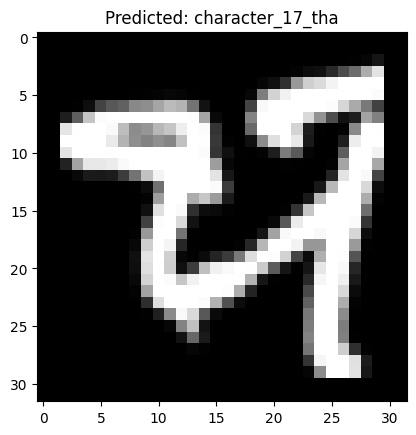

In [23]:
import random
i = random.randint(0, len(X_test)-1)

plt.imshow(X_test[i].reshape(img_size, img_size), cmap='gray')
pred = model.predict(np.expand_dims(X_test[i], axis=0))
plt.title(f"Predicted: {class_names[np.argmax(pred)]}")
plt.axis('on')
plt.show()
